## **Ejercicio**
Ccrea nuevas características a partir del resultado del ejercicio anterior (el dataset de autos con características seleccionadas) usando los métodos:
- transformaciones matemáticas
- conteo
- agrupamiento o combinación

*Nota: Las características deben ser distintas a la de este notebook*

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Cargar y Explorar los Datos

In [2]:
# Cargar el dataset
file_path = "../data/fe/autos.csv"
autos_df = pd.read_csv(file_path)

# Mostrar las primeras filas
autos_df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
# Información del dataset
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [4]:
# Estadísticas descriptivas
autos_df.describe()

,symboling,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,3.160622,98.923834,174.326425,65.893782,53.869948,2561.507772,4.419689,128.124352,3.330622,3.248860,9.860104,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,0.989583,6.152409,12.478593,2.137795,2.394770,526.700026,1.023182,41.590452,0.272385,0.315421,4.002098,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,98.000000,3.150000,3.110000,8.000000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,4.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,4.000000,146.000000,3.590000,3.410000,9.000000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Creación de Características

### 1 Transformaciones Matemáticas

In [5]:
# Crear una copia del DataFrame para aplicar las transformaciones
autos_transformed = autos_df.copy()

# Eficiencia de combustible combinada (ciudad y carretera)
autos_transformed['fuel_efficiency_combined'] = (autos_transformed['city_mpg'] + autos_transformed['highway_mpg']) / 2

# Diferencia entre MPG de ciudad y carretera (indica qué tan diferente es el rendimiento en distintos entornos)
autos_transformed['mpg_city_highway_diff'] = autos_transformed['highway_mpg'] - autos_transformed['city_mpg']

# Volumen del motor por cilindro (cc por cilindro)
autos_transformed['volume_per_cylinder'] = autos_transformed['engine_size'] / autos_transformed['num_of_cylinders']

# Relación entre longitud y anchura (aspecto del vehículo)
autos_transformed['length_width_ratio'] = autos_transformed['length'] / autos_transformed['width']

# Índice de precio por pulgada cúbica (una medida de valor)
autos_transformed['price_per_inch3'] = autos_transformed['price'] / (autos_transformed['length'] * autos_transformed['width'] * autos_transformed['height'])

# las nuevas características
new_math_features = ['fuel_efficiency_combined', 'mpg_city_highway_diff', 'volume_per_cylinder', 
                     'length_width_ratio', 'price_per_inch3']
autos_transformed[new_math_features].head()

,fuel_efficiency_combined,mpg_city_highway_diff,volume_per_cylinder,length_width_ratio,price_per_inch3
0,24.0,6,32.500000,2.633385,0.025558
1,24.0,6,32.500000,2.633385,0.031249
2,22.5,7,25.333333,2.613740,0.028081
3,27.0,6,27.250000,2.667674,0.021975
4,20.0,4,27.200000,2.659639,0.027405


Correlaciones con el precio:
price_per_inch3: 0.9720
volume_per_cylinder: 0.5970
length_width_ratio: 0.5319
mpg_city_highway_diff: -0.2400
fuel_efficiency_combined: -0.7181


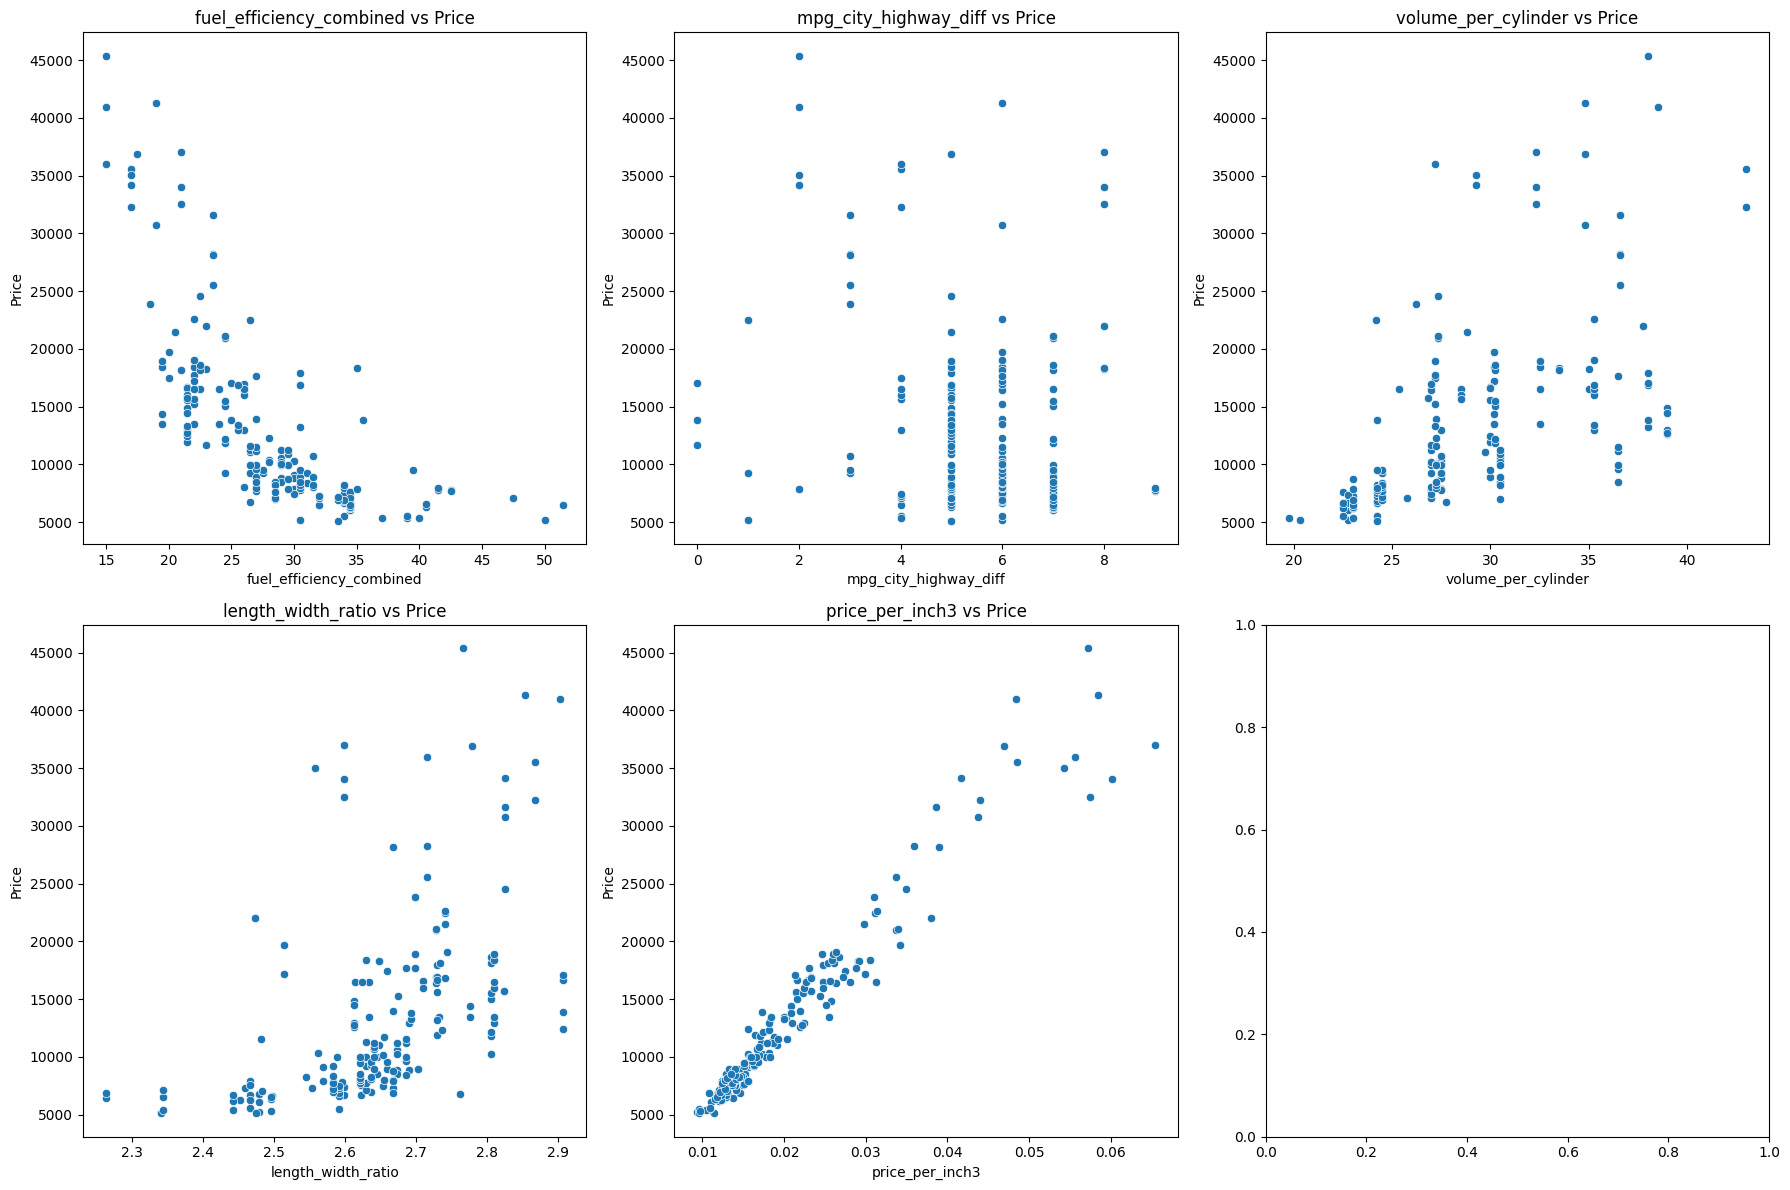

In [6]:
# Visualizar las relaciones entre estas nuevas características y el precio
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(new_math_features):
    if i < len(axes):
        sns.scatterplot(x=feature, y='price', data=autos_transformed, ax=axes[i])
        axes[i].set_title(f'{feature} vs Price')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Price')

# Calcular las correlaciones con el precio
correlations = autos_transformed[new_math_features + ['price']].corr()['price'].sort_values(ascending=False)
print("Correlaciones con el precio:")
for feature, corr in correlations.items():
    if feature != 'price':
        print(f"{feature}: {corr:.4f}")
        
plt.tight_layout()
plt.show()

### 2 Características Basadas en Conteo

In [7]:
# Identificar automóviles de lujo (basado en precio)
luxury_threshold = autos_transformed['price'].quantile(0.75)
autos_transformed['is_luxury'] = (autos_transformed['price'] > luxury_threshold).astype(int)

# Identificar automóviles económicos (basado en precio)
economy_threshold = autos_transformed['price'].quantile(0.25)
autos_transformed['is_economy'] = (autos_transformed['price'] < economy_threshold).astype(int)

# Identificar automóviles de alta eficiencia en combustible
fuel_efficient_threshold = autos_transformed['fuel_efficiency_combined'].quantile(0.75)
autos_transformed['is_fuel_efficient'] = (autos_transformed['fuel_efficiency_combined'] > fuel_efficient_threshold).astype(int)

# Identificar automóviles con motor grande
large_engine_threshold = autos_transformed['engine_size'].quantile(0.75)
autos_transformed['has_large_engine'] = (autos_transformed['engine_size'] > large_engine_threshold).astype(int)

# Contando características premium
## creamos una característica que indica si es un automóvil deportivo
sports_car_types = ['convertible', 'hatchback', 'hardtop']
autos_transformed['is_sports_car'] = autos_transformed['body_style'].apply(lambda x: 1 if x.lower() in sports_car_types else 0)

## contamos características premium
premium_features = ['is_luxury', 'has_large_engine', 'is_sports_car']
autos_transformed['premium_features_count'] = autos_transformed[premium_features].sum(axis=1)


# las nuevas características
binary_features = ['is_luxury', 'is_economy', 'is_fuel_efficient', 'has_large_engine', 'is_sports_car', 'premium_features_count']
autos_transformed[binary_features].head(10)

,is_luxury,is_economy,is_fuel_efficient,has_large_engine,is_sports_car,premium_features_count
0,0,0,0,0,1,1
1,0,0,0,0,1,1
2,0,0,0,1,1,2
3,0,0,0,0,0,0
4,1,0,0,0,0,1
5,0,0,0,0,0,0
6,1,0,0,0,0,1
7,1,0,0,0,0,1
8,1,0,0,0,0,1
9,0,0,0,0,0,0


Correlaciones con el precio:
is_luxury: 0.7986
has_large_engine: 0.6918
premium_features_count: 0.6647
is_sports_car: -0.1296
is_fuel_efficient: -0.4345
is_economy: -0.4760


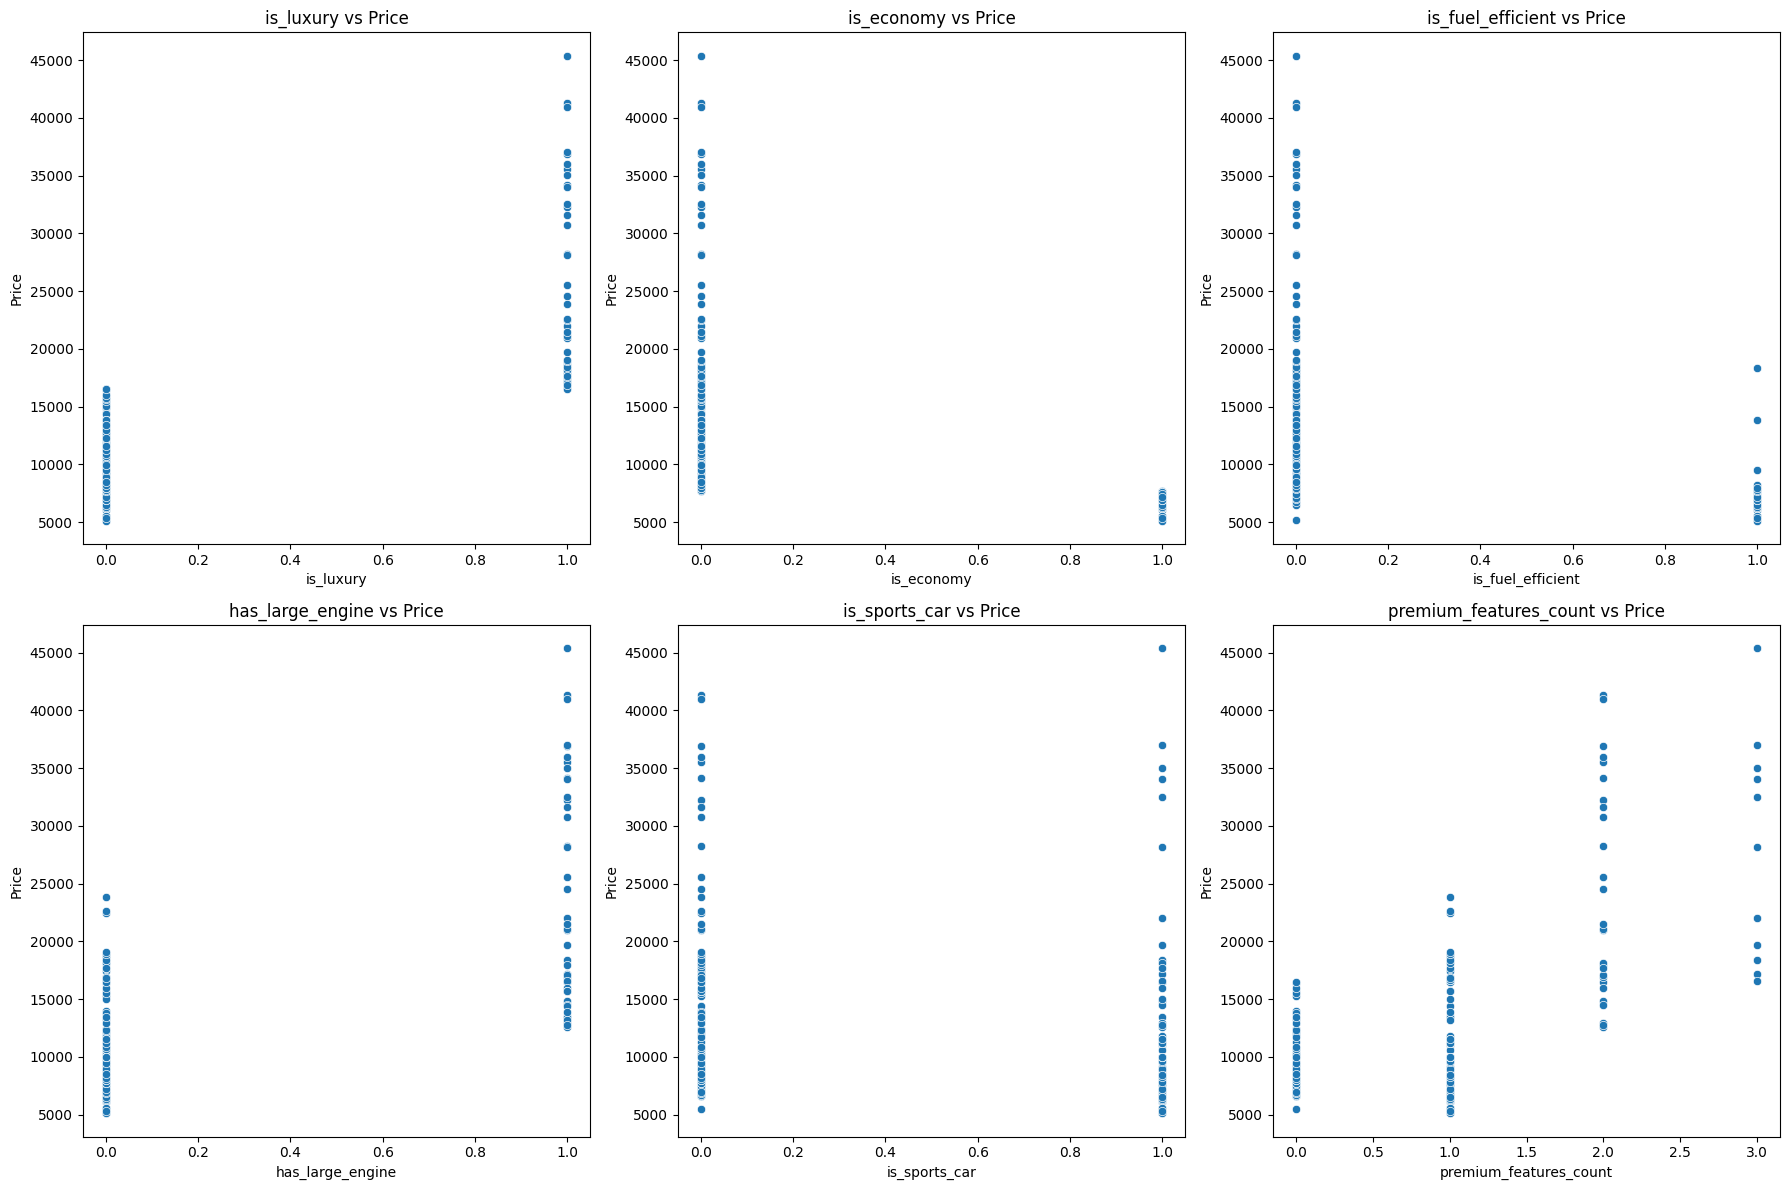

In [8]:
# Visualizar las relaciones entre estas nuevas características y el precio
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    if i < len(axes):
        sns.scatterplot(x=feature, y='price', data=autos_transformed, ax=axes[i])
        axes[i].set_title(f'{feature} vs Price')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Price')

# Calcular las correlaciones con el precio
correlations = autos_transformed[binary_features + ['price']].corr()['price'].sort_values(ascending=False)
print("Correlaciones con el precio:")
for feature, corr in correlations.items():
    if feature != 'price':
        print(f"{feature}: {corr:.4f}")
        
plt.tight_layout()
plt.show()

### 3 Agrupamiento y Combinación

In [ ]:
# Precio promedio por marca
make_avg_price = autos_transformed.groupby('make')['price'].transform('mean')
autos_transformed['make_avg_price'] = make_avg_price

# Precio relativo comparado con el promedio de la marca (ratio)
autos_transformed['price_to_make_avg_ratio'] = autos_transformed['price'] / autos_transformed['make_avg_price']

# Potencia promedio por marca
make_avg_hp = autos_transformed.groupby('make')['horsepower'].transform('mean')
autos_transformed['make_avg_horsepower'] = make_avg_hp

# Desviación de potencia respecto al promedio de la marca
autos_transformed['horsepower_deviation_from_make_avg'] = autos_transformed['horsepower'] - autos_transformed['make_avg_horsepower']

# Combinación de marca y tipo de carrocería
autos_transformed['make_body_combo'] = autos_transformed['make'] + '_' + autos_transformed['body_style']

# Precio promedio por combinación de marca y tipo de carrocería
make_body_avg_price = autos_transformed.groupby('make_body_combo')['price'].transform('mean')
autos_transformed['make_body_avg_price'] = make_body_avg_price

# las nuevas características
group_features = ['make_avg_price', 'price_to_make_avg_ratio', 'make_avg_horsepower', 
                  'horsepower_deviation_from_make_avg', 'make_body_avg_price']
autos_transformed[['make', 'body_style', 'price', 'horsepower'] + group_features].head()

,make,body_style,price,horsepower,make_avg_price,price_to_make_avg_ratio,make_avg_horsepower,horsepower_deviation_from_make_avg,make_body_avg_price
0,alfa-romero,convertible,13495,111,15498.333333,0.870739,125.333333,-14.333333,14997.5
1,alfa-romero,convertible,16500,111,15498.333333,1.064631,125.333333,-14.333333,14997.5
2,alfa-romero,hatchback,16500,154,15498.333333,1.064631,125.333333,28.666667,16500.0
3,audi,sedan,13950,102,17859.166667,0.781111,114.500000,-12.500000,17647.0
4,audi,sedan,17450,115,17859.166667,0.977089,114.500000,0.500000,17647.0


Correlaciones con el precio:
make_body_avg_price: 0.9144
make_avg_price: 0.8934
make_avg_horsepower: 0.7988
price_to_make_avg_ratio: 0.4056
horsepower_deviation_from_make_avg: 0.3455


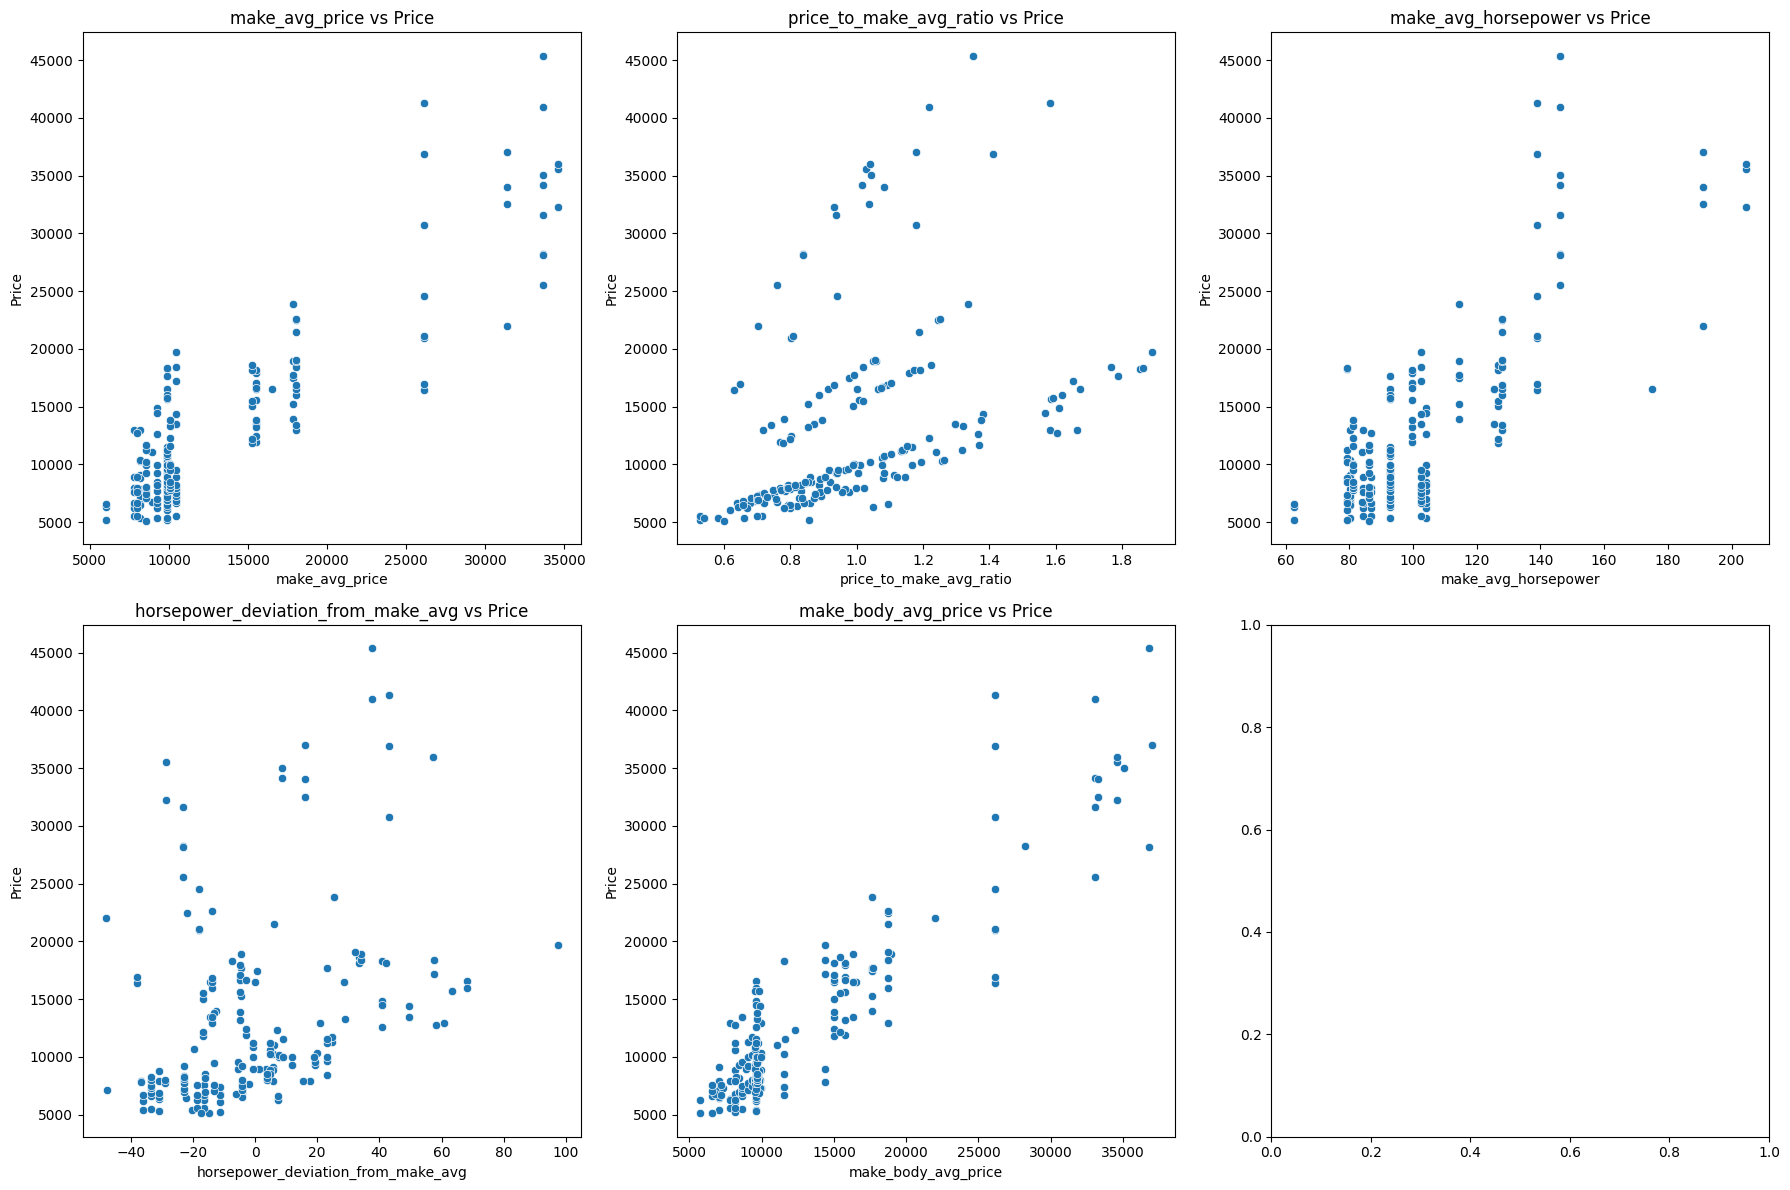

In [10]:
# Visualizar las relaciones entre estas nuevas características y el precio
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(group_features):
    if i < len(axes):
        sns.scatterplot(x=feature, y='price', data=autos_transformed, ax=axes[i])
        axes[i].set_title(f'{feature} vs Price')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Price')

# Calcular las correlaciones con el precio
correlations = autos_transformed[group_features + ['price']].corr()['price'].sort_values(ascending=False)
print("Correlaciones con el precio:")
for feature, corr in correlations.items():
    if feature != 'price':
        print(f"{feature}: {corr:.4f}")
        
plt.tight_layout()
plt.show()